<a href="https://colab.research.google.com/github/Belal-AI/Parking-recommendation-system-Autonomous-Vehicle/blob/main/ML_model_Recommender_last.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
import seaborn as sns
import joblib

**Reading the data set for bikes parking we will use it as real data which has the same features we need in our case ,we will replace it through the time from the real time data**

In [2]:
data=pd.read_csv(r"/content/train.csv")
test = pd.read_csv(r"/content/test.csv")

In [3]:
test

,Id,Date,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point,Solar_Radiation,Rainfall,Snowfall,Season,IsHoliday,IsFunctioningDay
0,4136,22/05/2018,8,18.2,63,0.8,1731,11.0,1.00,0.0,0.0,Spring,1,1
1,6705,06/09/2018,9,23.5,72,0.5,1485,18.1,0.95,0.0,0.0,Autumn,0,1
2,3538,27/04/2018,10,15.3,50,1.0,944,4.9,1.97,0.0,0.0,Spring,0,1
3,6583,01/09/2018,7,21.1,81,1.0,1738,17.7,0.14,0.0,0.0,Autumn,0,1
4,1993,22/02/2018,1,-2.2,58,1.0,2000,-9.3,0.00,0.0,0.0,Winter,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,6075,11/08/2018,3,27.9,69,0.8,2000,21.6,0.00,0.0,0.0,Summer,0,1
1496,7629,14/10/2018,21,13.8,66,2.4,1897,7.5,0.00,0.0,0.0,Autumn,0,1
1497,5117,02/07/2018,5,20.7,97,0.3,2000,20.2,0.00,0.5,0.0,Summer,0,1
1498,1790,13/02/2018,14,3.7,39,3.8,1908,-9.0,2.19,0.0,0.0,Winter,0,1


In [4]:
data.isna().sum()

Id                  0
Date                0
Hour                0
Temperature         0
Humidity            0
Wind_Speed          0
Visibility          0
Dew_Point           0
Solar_Radiation     0
Rainfall            0
Snowfall            0
Season              0
IsHoliday           0
IsFunctioningDay    0
Bikes_Rented        0
dtype: int64

In [5]:
data[['day','month','year']]=data['Date'].str.split('/',expand=True)
test[['day','month','year']]=test['Date'].str.split('/',expand=True)


In [6]:
test

,Id,Date,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point,Solar_Radiation,Rainfall,Snowfall,Season,IsHoliday,IsFunctioningDay,day,month,year
0,4136,22/05/2018,8,18.2,63,0.8,1731,11.0,1.00,0.0,0.0,Spring,1,1,22,05,2018
1,6705,06/09/2018,9,23.5,72,0.5,1485,18.1,0.95,0.0,0.0,Autumn,0,1,06,09,2018
2,3538,27/04/2018,10,15.3,50,1.0,944,4.9,1.97,0.0,0.0,Spring,0,1,27,04,2018
3,6583,01/09/2018,7,21.1,81,1.0,1738,17.7,0.14,0.0,0.0,Autumn,0,1,01,09,2018
4,1993,22/02/2018,1,-2.2,58,1.0,2000,-9.3,0.00,0.0,0.0,Winter,0,1,22,02,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,6075,11/08/2018,3,27.9,69,0.8,2000,21.6,0.00,0.0,0.0,Summer,0,1,11,08,2018
1496,7629,14/10/2018,21,13.8,66,2.4,1897,7.5,0.00,0.0,0.0,Autumn,0,1,14,10,2018
1497,5117,02/07/2018,5,20.7,97,0.3,2000,20.2,0.00,0.5,0.0,Summer,0,1,02,07,2018
1498,1790,13/02/2018,14,3.7,39,3.8,1908,-9.0,2.19,0.0,0.0,Winter,0,1,13,02,2018


In [7]:
data.drop('Date',inplace=True,axis=1)
test.drop('Date',inplace=True,axis=1)

In [8]:
data.drop('Id',inplace=True,axis=1)
test.drop('Id',inplace=True,axis=1)

In [9]:
test

,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point,Solar_Radiation,Rainfall,Snowfall,Season,IsHoliday,IsFunctioningDay,day,month,year
0,8,18.2,63,0.8,1731,11.0,1.00,0.0,0.0,Spring,1,1,22,05,2018
1,9,23.5,72,0.5,1485,18.1,0.95,0.0,0.0,Autumn,0,1,06,09,2018
2,10,15.3,50,1.0,944,4.9,1.97,0.0,0.0,Spring,0,1,27,04,2018
3,7,21.1,81,1.0,1738,17.7,0.14,0.0,0.0,Autumn,0,1,01,09,2018
4,1,-2.2,58,1.0,2000,-9.3,0.00,0.0,0.0,Winter,0,1,22,02,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,3,27.9,69,0.8,2000,21.6,0.00,0.0,0.0,Summer,0,1,11,08,2018
1496,21,13.8,66,2.4,1897,7.5,0.00,0.0,0.0,Autumn,0,1,14,10,2018
1497,5,20.7,97,0.3,2000,20.2,0.00,0.5,0.0,Summer,0,1,02,07,2018
1498,14,3.7,39,3.8,1908,-9.0,2.19,0.0,0.0,Winter,0,1,13,02,2018


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7260 entries, 0 to 7259
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Hour              7260 non-null   int64  
 1   Temperature       7260 non-null   float64
 2   Humidity          7260 non-null   int64  
 3   Wind_Speed        7260 non-null   float64
 4   Visibility        7260 non-null   int64  
 5   Dew_Point         7260 non-null   float64
 6   Solar_Radiation   7260 non-null   float64
 7   Rainfall          7260 non-null   float64
 8   Snowfall          7260 non-null   float64
 9   Season            7260 non-null   object 
 10  IsHoliday         7260 non-null   int64  
 11  IsFunctioningDay  7260 non-null   int64  
 12  Bikes_Rented      7260 non-null   int64  
 13  day               7260 non-null   object 
 14  month             7260 non-null   object 
 15  year              7260 non-null   object 
dtypes: float64(6), int64(6), object(4)
memory 

In [11]:
data.drop('Bikes_Rented',inplace=True,axis=1)

In [12]:
data.drop('Snowfall',inplace=True,axis=1)
test.drop('Snowfall',inplace=True,axis=1)

In [13]:
data['day']=np.int64(data['day'])
test['day']=np.int64(test['day'])

In [14]:
data['month']=np.int64(data['month'])
data['year']=np.int64(data['year'])

test['month']=np.int64(test['month'])
test['year']=np.int64(test['year'])

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7260 entries, 0 to 7259
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Hour              7260 non-null   int64  
 1   Temperature       7260 non-null   float64
 2   Humidity          7260 non-null   int64  
 3   Wind_Speed        7260 non-null   float64
 4   Visibility        7260 non-null   int64  
 5   Dew_Point         7260 non-null   float64
 6   Solar_Radiation   7260 non-null   float64
 7   Rainfall          7260 non-null   float64
 8   Season            7260 non-null   object 
 9   IsHoliday         7260 non-null   int64  
 10  IsFunctioningDay  7260 non-null   int64  
 11  day               7260 non-null   int64  
 12  month             7260 non-null   int64  
 13  year              7260 non-null   int64  
dtypes: float64(5), int64(8), object(1)
memory usage: 794.2+ KB


In [26]:
corr=data.corr()

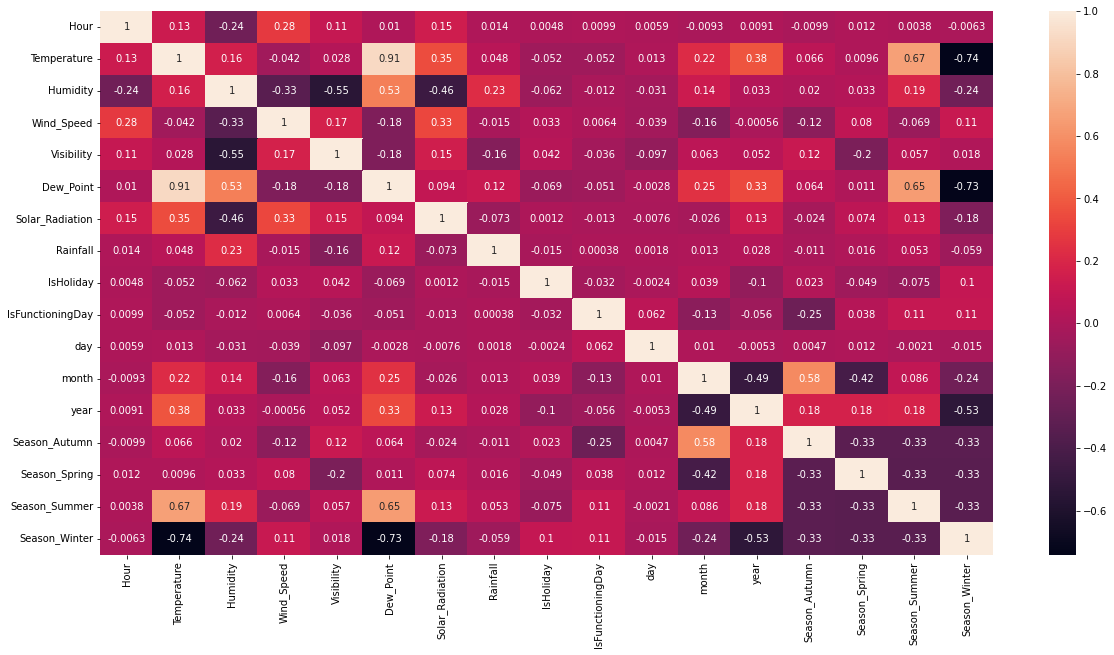

In [29]:
plt.figure(figsize=(20,10))
sns.heatmap(data=corr,annot=True)

In [16]:
data=pd.get_dummies(data=data)
test=pd.get_dummies(data=test)


In [17]:
test

,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point,Solar_Radiation,Rainfall,IsHoliday,IsFunctioningDay,day,month,year,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
0,8,18.2,63,0.8,1731,11.0,1.00,0.0,1,1,22,5,2018,0,1,0,0
1,9,23.5,72,0.5,1485,18.1,0.95,0.0,0,1,6,9,2018,1,0,0,0
2,10,15.3,50,1.0,944,4.9,1.97,0.0,0,1,27,4,2018,0,1,0,0
3,7,21.1,81,1.0,1738,17.7,0.14,0.0,0,1,1,9,2018,1,0,0,0
4,1,-2.2,58,1.0,2000,-9.3,0.00,0.0,0,1,22,2,2018,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,3,27.9,69,0.8,2000,21.6,0.00,0.0,0,1,11,8,2018,0,0,1,0
1496,21,13.8,66,2.4,1897,7.5,0.00,0.0,0,1,14,10,2018,1,0,0,0
1497,5,20.7,97,0.3,2000,20.2,0.00,0.5,0,1,2,7,2018,0,0,1,0
1498,14,3.7,39,3.8,1908,-9.0,2.19,0.0,0,1,13,2,2018,0,0,0,1


In [18]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init="k-means++",random_state=10)
  kmeans.fit(np.array(data))
  wcss.append(kmeans.inertia_)


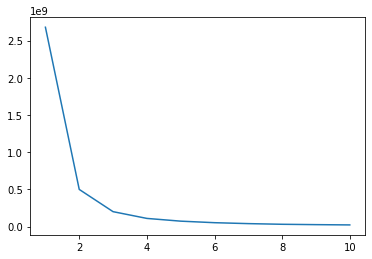

In [19]:
plt.plot(range(1,11),wcss)

In [65]:
kmean_model=KMeans(n_clusters=3,init="k-means++",random_state=10)

In [66]:
kmean_model.fit(np.array(data))

KMeans(n_clusters=3, random_state=10)

In [67]:
target=kmean_model.predict(np.array(data))

In [68]:
test_target =kmean_model.predict(np.array(test))

In [69]:
target

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [70]:
test_target

array([1, 2, 2, ..., 1, 1, 1], dtype=int32)

In [71]:
from sklearn.metrics import davies_bouldin_score

In [72]:
print(davies_bouldin_score(data, kmean_model.labels_))


0.4648858484710976


In [74]:
 joblib.dump(kmean_model,"clusterd.pkl")

['clusterd.pkl']